In [1]:
# Base importing
import sys
sys.path.append("..")

from utiltis import read_img
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = cv2.imread('../pics/test5c_r.jpg', 0)

## Part I: Machinsim example 
1. Use template to get the match map with NCC algorithms
2. Get mutiple locators to form a cropping area
3. Crop original image

In [2]:
from ncc_match import NccMatcher

img = cv2.imread('../pics/test5c_r.jpg', 0)
proc = NccMatcher()
proc.load_img(img)
matched = proc()
w, h = proc._temp.shape[::-1]

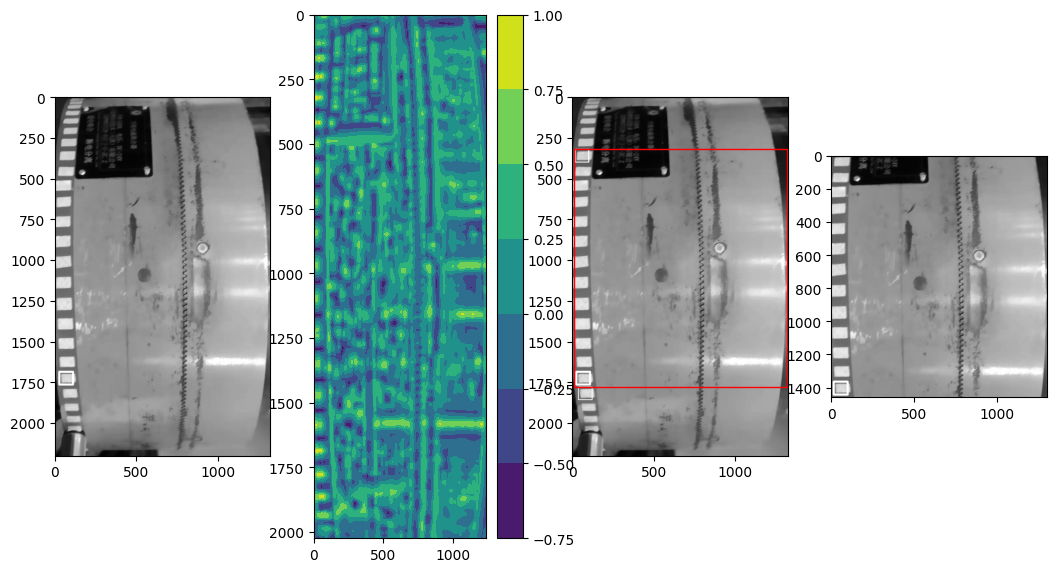

In [3]:
from matplotlib import patches as patches
from loc_crop import top_index, get_clips

# Top template matching 
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(matched)
cv2.rectangle(img, max_loc, (max_loc[0] + w, max_loc[1] + h), 255, 12)

# Mutiple matching 
loc_idx = top_index(matched, top_k=15)
this_img = img.copy()
for i, j in zip(*loc_idx):
    cv2.rectangle(this_img, (j, i), (j + w, i + h), 255, 4)

rparas = get_clips(img, matched, top_k=15, shirnk_bias=10)
rect = patches.Rectangle(*rparas, lw=1, edgecolor="r", facecolor="none")

# Image cropping
cropped_img = get_clips(img, matched, top_k=15, shirnk_bias=10, crop_return=True)

fig, axs = plt.subplots(1, 4, figsize=(16, 9))
fig.set_figheight(6.8); fig.set_figwidth(12.8)
# plt.subplots_adjust(wspace=.8)
axs[0].imshow(img,cmap = 'gray') # Original display
# plt.title(f'OTSU binary(t={tval}')
cm = axs[1].contourf(matched[:-100, :])                          # Match map
plt.colorbar(cm, ax=axs[1])
axs[1].invert_yaxis()                             # Locator-labelled image
axs[2].imshow(this_img, cmap='gray')
axs[2].add_patch(rect)                           # Cropped image
axs[3].imshow(cropped_img, cmap='gray')

### A throught API usage demonstration

In [5]:
from proc import ImgPipeline
from ncc_match import NccMatcher
from loc_crop import LocCropper

proc_pipe = ImgPipeline(NccMatcher, LocCropper)
proc_pipe.load_img(img)
args_dict = {0:[], 1:[img]}

cropped = proc_pipe.proc(args_dict=args_dict)

[1]


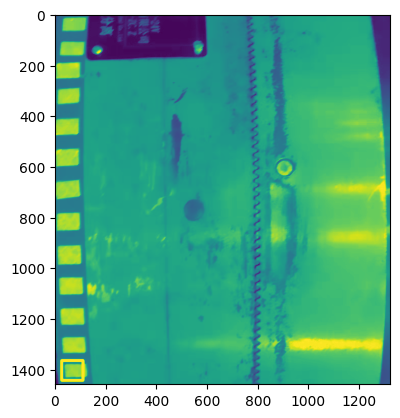

In [8]:
plt.imshow(cropped[0])

### A deeper usage

In [9]:
from proc import ImgPipeline
from ncc_match import NccMatcher
from loc_crop import LocCropper
from thr_binary import AdaBinary

proc_pipe = ImgPipeline(NccMatcher, LocCropper, AdaBinary)
proc_pipe.load_img(img)
args_dict = {0:[], 1:[img]}

binary_cropped = proc_pipe.proc(args_dict=args_dict)

[2]


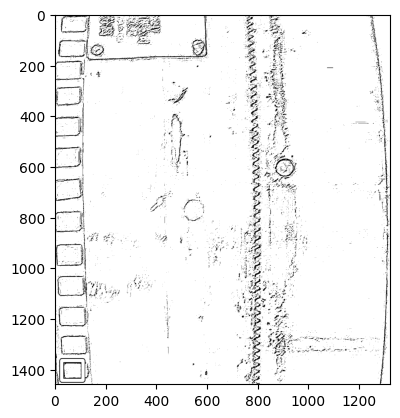

In [11]:
plt.imshow(binary_cropped[0], cmap='gray')